Heart Disease 

Introduction:

The data set consists of different attributes of heart disease from different institutes: the Hungarian Institute of Cardiology, the University Hospital in Zurich, Switzerland, the University Hospital in Basel, Switzerland, the V.A. Medical Center, Long Beach and the Cleveland Clinic Foundation. It includes data on things such as their age, cholesterol levels, resting ecg measurements, etc. We want to try and predict the angiographic disease status based attributes of patients. This will be achieved using a model that we will create by training our data using the data set.
Question: Is it possible to predict the angiographic disease status of a patient based on the attributes given?



In [36]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

combining data sets to make training dataframe

In [37]:
columns = c("age", "sex", "cp", "trestbps", "chol", "fbs",
            "restecg", "maxheartrate", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_data1 <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", delim = ",", col_names = columns)
heart_data2 <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", delim = ",", col_names = columns)
heart_data3 <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", delim = ",", col_names = columns)
heart_data1
heart_data2
heart_data3

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_character(),
  chol = col_character(),
  fbs = col_character(),
  restecg = col_character(),
  maxheartrate = col_character(),
  exang = col_character(),
  oldpeak = col_double(),
  slope = col_character(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  maxheartrate = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_character(),
  chol = col_double(),
  fbs = col_character(),
  restecg = col_character(),
  m

age,sex,cp,trestbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
32,1,1,95,0,?,0,127,0,.7,1,?,?,1
34,1,4,115,0,?,?,154,0,.2,1,?,?,1
35,1,4,?,0,?,0,130,1,?,?,?,7,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
73,0,3,160,0,0,1,121,0,0,1,?,3,1
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


data wrangling:

In [38]:
heart_disease_train <- rbind(heart_data1, heart_data2, heart_data3) %>%
select(-slope, -ca, -thal) %>%
filter(trestbps != "?", chol != "?", num != "?", num %in% c(0,1))%>%
mutate(sex = as_factor(sex), cp = as_factor(cp), fbs = as_factor(fbs),
      restecg = as_factor(restecg), exang = as_factor(exang), num = as_factor(num),
      trestbps = as.numeric(trestbps), chol = as.numeric(chol), 
       maxheartrate = as.numeric(maxheartrate))
heart_disease_train

age,sex,cp,trestbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<chr>,<fct>
28,1,2,130,132,0,2,185,0,0,0
29,1,2,120,243,0,0,160,0,0,0
30,0,1,170,237,0,1,170,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,0
73,0,3,160,0,0,1,121,0,0,1
74,1,2,145,0,?,1,123,0,1.3,1


The following shows 3 table summaries of the data: observations per class, 
average cholestrol, number of rows with missing cholesterol data

In [39]:
observation_per_class <- heart_disease_train %>%
                            group_by(num) %>%
                            summarize(n = n())
mean_chol <- heart_disease_train %>%
                select(chol) %>%
                summarize(chol_avg = mean(chol))
missing_data <- rbind(heart_data1, heart_data2, heart_data3) %>%
                            filter(chol == "?") %>%
                            group_by(chol) %>%
                            summarize(n = n())
observation_per_class
mean_chol
missing_data

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
0,341
1,204


chol_avg
<dbl>
222.3229


chol,n
<chr>,<int>
?,23


The following shows a possible visualization of the data set

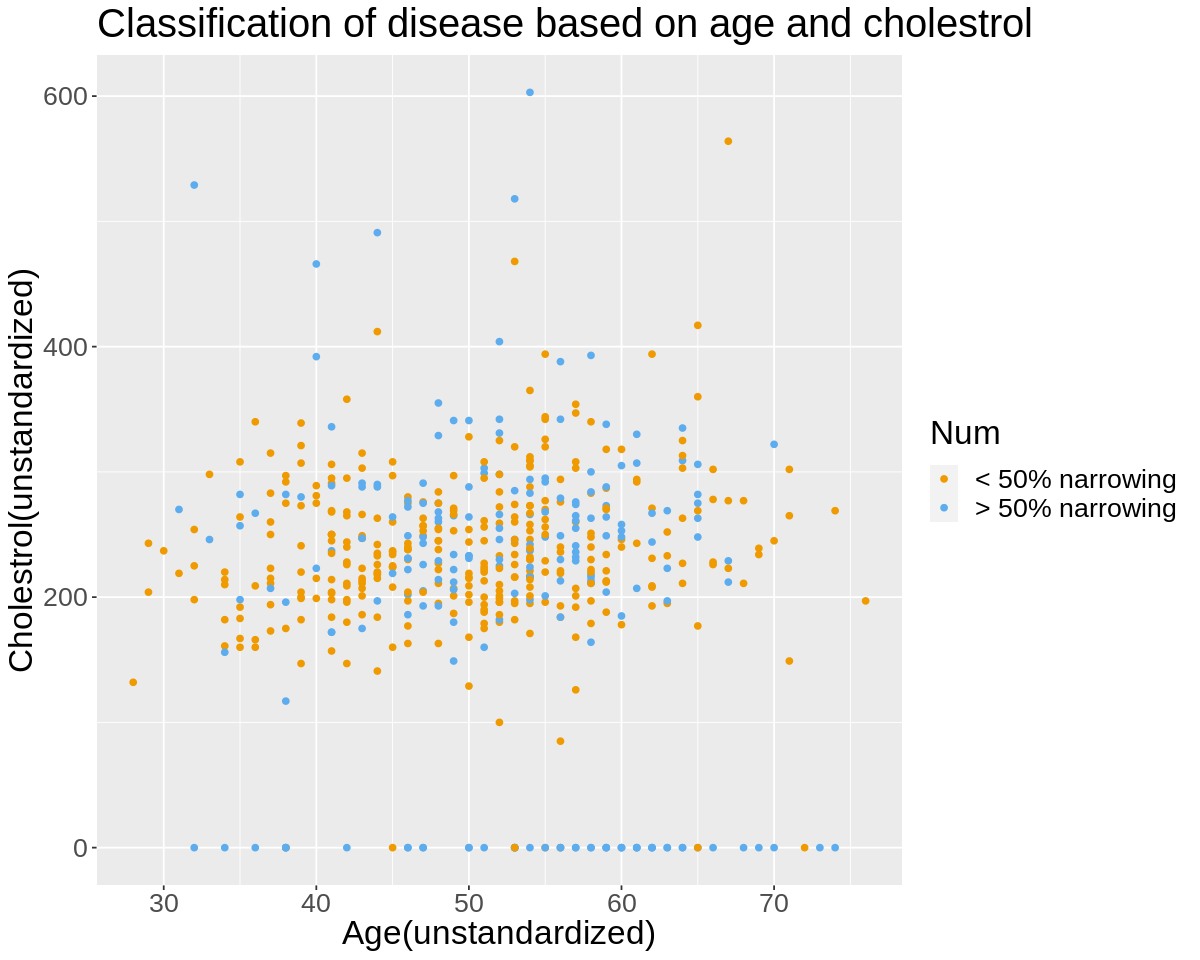

In [40]:
options (repr.plot.width = 10, repr.plot.height = 8)

disease_plot <- ggplot(heart_disease_train, aes(x = age, y = chol))+
                geom_point(aes(colour = num)) +
                labs(x = "Age(unstandardized)", y = "Cholestrol(unstandardized)",
                    colour = "Num")+
                scale_color_manual(labels = c("< 50% narrowing ", "> 50% narrowing"), 
                     values = c("orange2", "steelblue2")) +
                theme(text = element_text(size = 20))+
                ggtitle("Classification of disease based on age and cholestrol")
disease_plot

The following also shows the distribution of the prediction variables

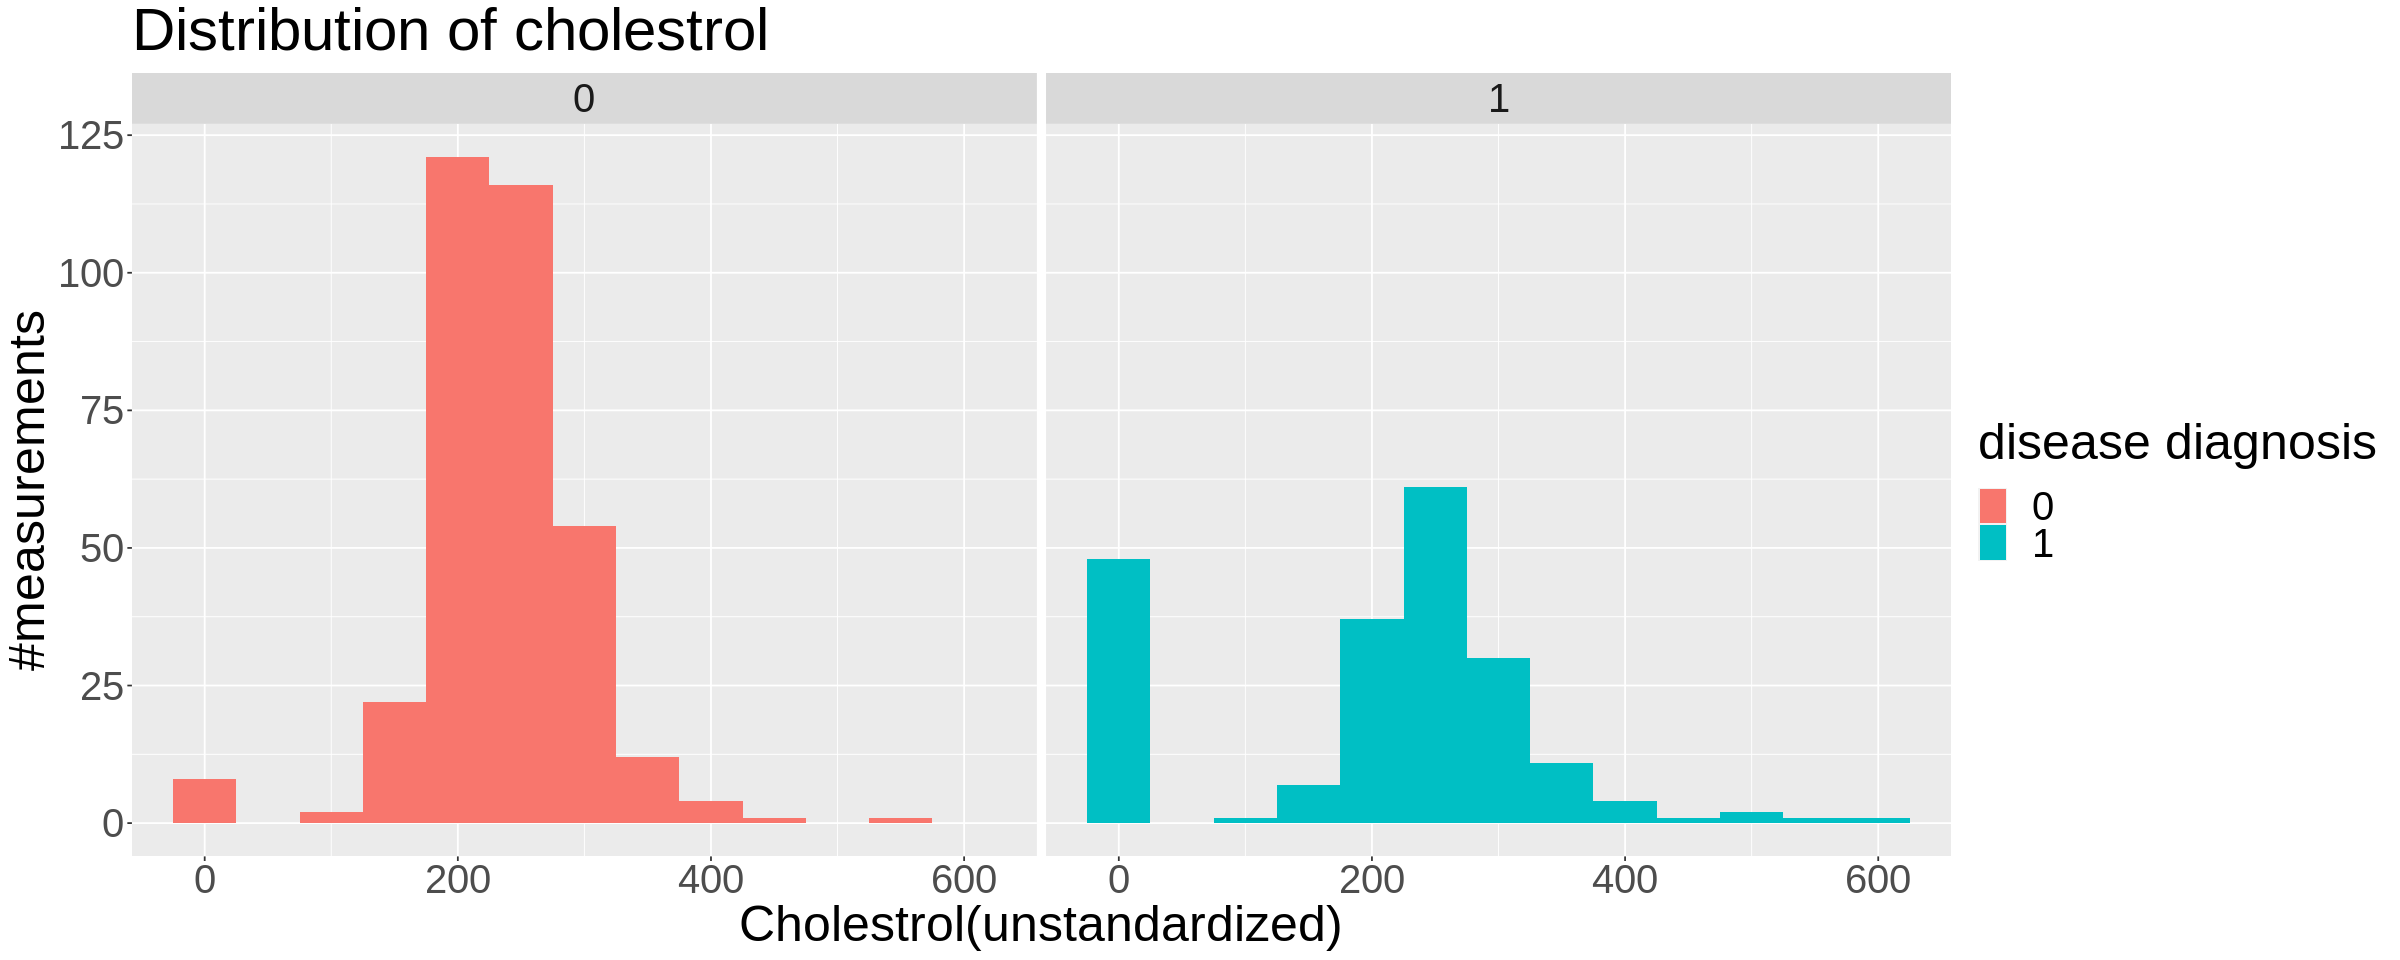

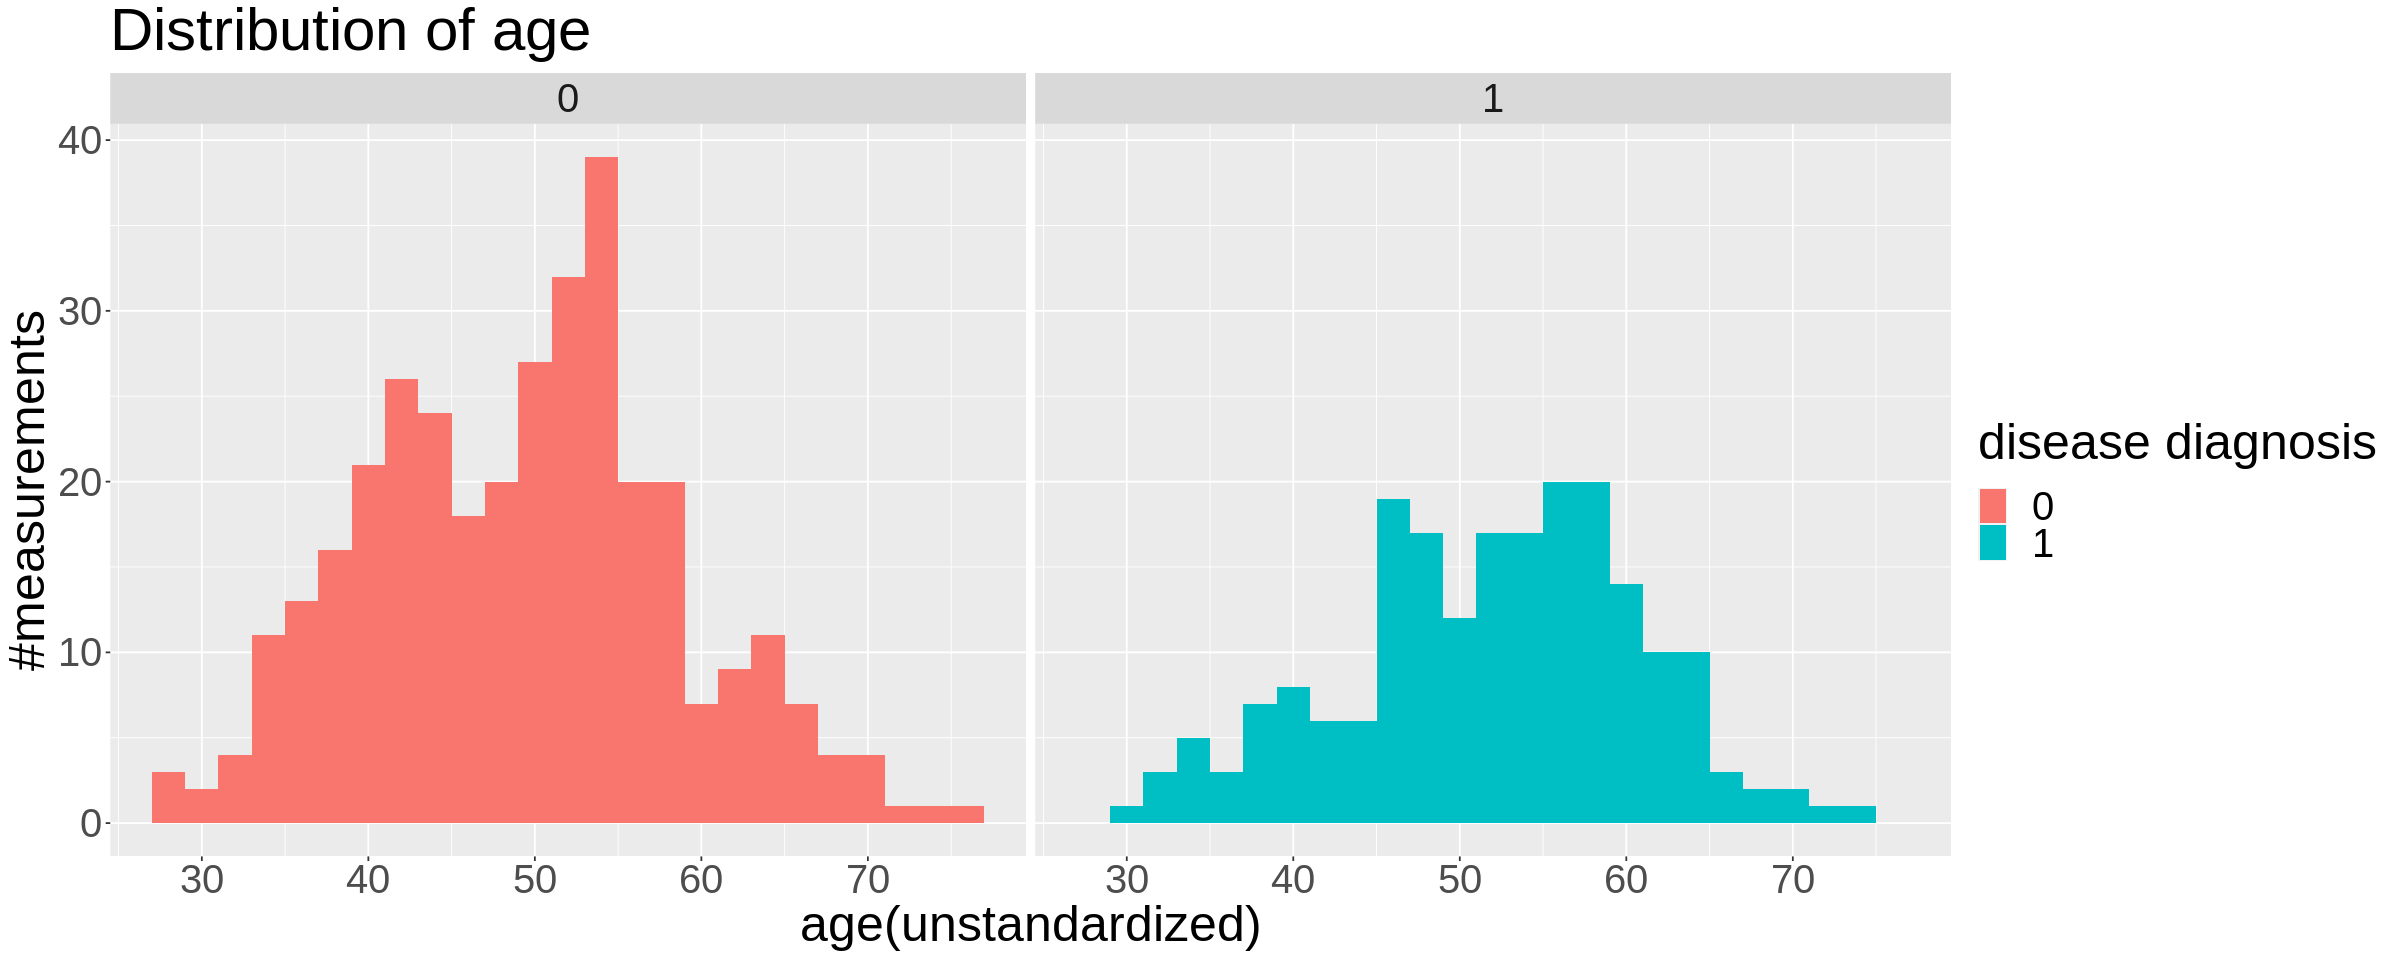

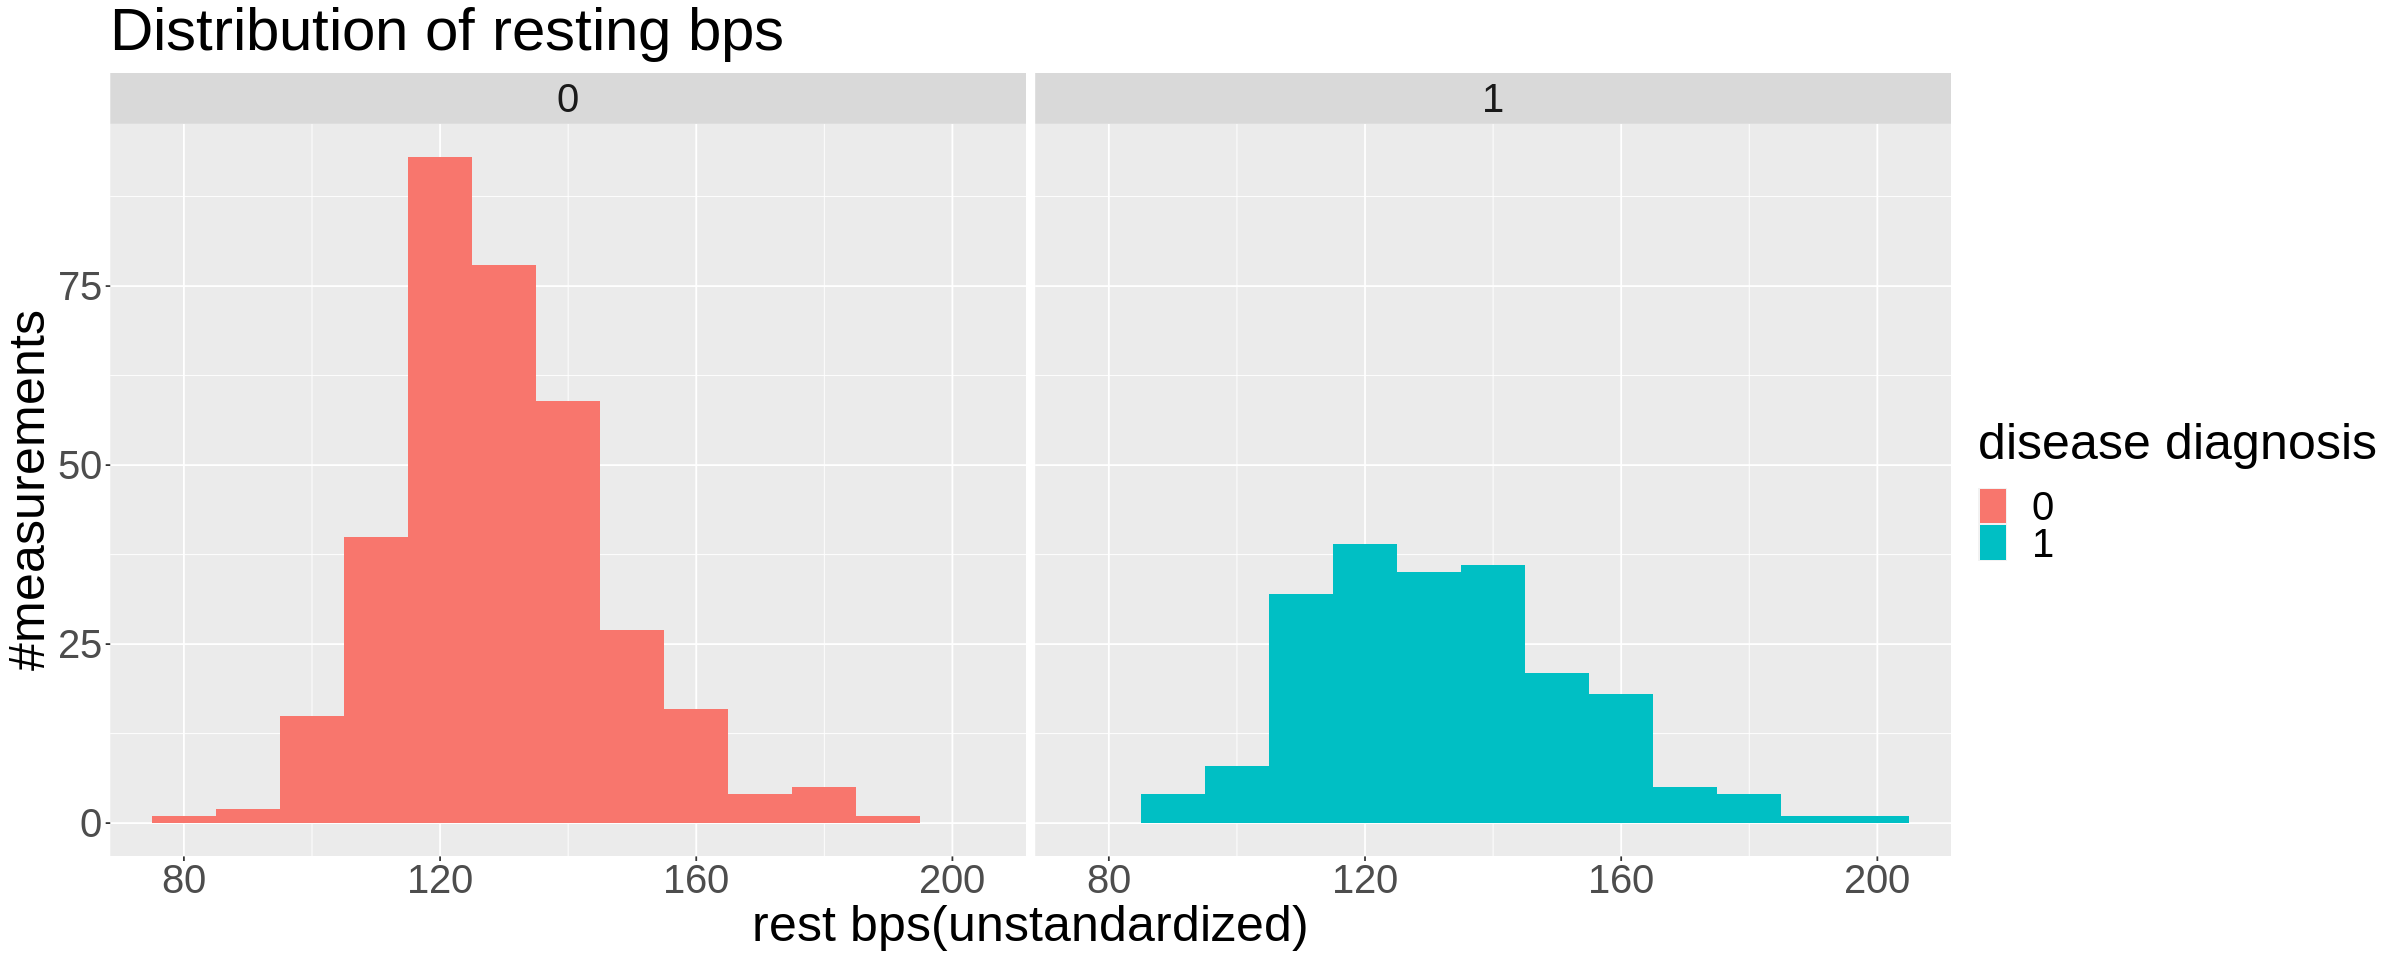

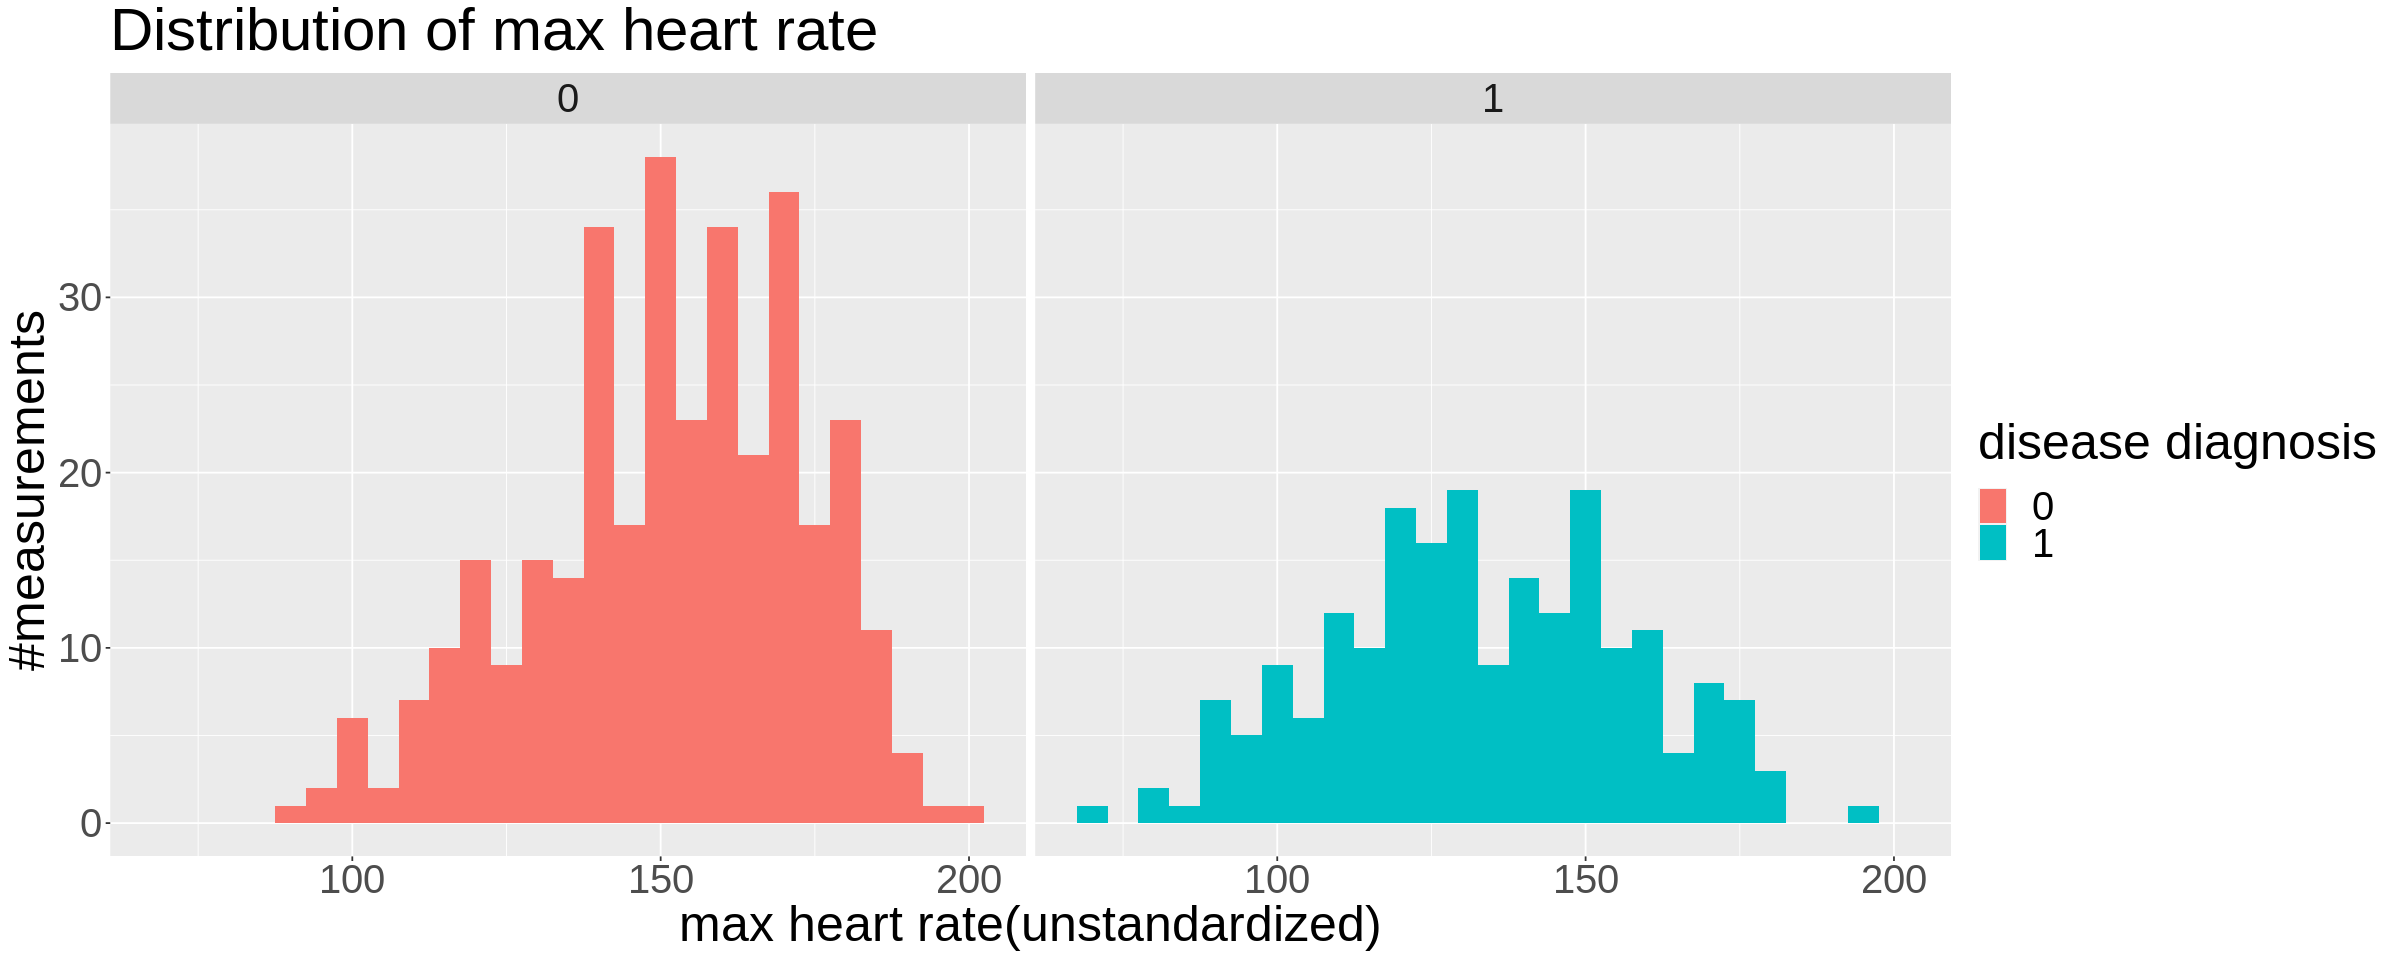

In [41]:
options (repr.plot.width = 20, repr.plot.height = 8)
disease_chol_hist <- ggplot(heart_disease_train, aes(x = chol, fill = as_factor(num)))+
                geom_histogram(binwidth = 50) +
                labs(x = "Cholestrol(unstandardized)", y = "#measurements",
                    fill = "disease diagnosis")+
                theme(text = element_text(size = 30))+
                facet_grid(cols = vars(num))+
                ggtitle("Distribution of cholestrol")

disease_age_hist <- ggplot(heart_disease_train, aes(x = age, fill = as_factor(num)))+
                geom_histogram(binwidth = 2) +
                labs(x = "age(unstandardized)", y = "#measurements",
                    fill = "disease diagnosis")+
                theme(text = element_text(size = 30))+
                facet_grid(cols = vars(num))+
                ggtitle("Distribution of age")

disease_trestbps_hist <- ggplot(heart_disease_train, aes(x = trestbps, fill = as_factor(num)))+
                geom_histogram(binwidth = 10) +
                labs(x = "rest bps(unstandardized)", y = "#measurements",
                    fill = "disease diagnosis")+
                theme(text = element_text(size = 30))+
                facet_grid(cols = vars(num))+
                ggtitle("Distribution of resting bps")

disease_maxheartrate_hist <- ggplot(heart_disease_train, aes(x = maxheartrate, fill = as_factor(num)))+
                geom_histogram(binwidth = 5) +
                labs(x = "max heart rate(unstandardized)", y = "#measurements",
                    fill = "disease diagnosis")+
                theme(text = element_text(size = 30))+
                facet_grid(cols = vars(num))+
                ggtitle("Distribution of max heart rate")

disease_chol_hist
disease_age_hist
disease_trestbps_hist
disease_maxheartrate_hist

Methods:

There is data on the angiographic disease status of patients, as well as other characteristics of the corresponding patients. 3 of the 4 data files were combined to be used as training, the last one will be used for testing.
3 of the columns are excluded as they hold no valuable information, and most elements are unknown. The main columns that will be used for prediction will be resting blood pressure(trestbps), age, cholesterol(chol), and max heart rate.
One way to visualise this data is to plot age against cholesterol, and color the points by disease diagnosis, this has been demonstrated in our graph.

Expected outcomes and significance:


What do you expect to find?

We hypothesise some characteristics, like older age, high cholesterol levels, and high blood pressure will result in an angiographic disease diagnosis of > 50% narrowing.  

What impact could such findings have?

It could help with quick and easy diagnosis of the data, to get aid to patients who appear to need it more, quicker

What future questions could this lead to?

By identifying the key factors that lead to the angiographic disease, we can ask how to limit these factors to prevent these diseases.

